# *Transfer learning* et apprentissage multi-tâches ☕️☕️

**<span style='color:blue'> Objectifs de la séquence</span>** 
* Être sensibilisé&nbsp;:
    * au *transfer learning* comme outil de régularisation en *deep learning*,
    * à l'apprentissage multi-tâche.
* Être capable de&nbsp;:
    * d'implémenter ces différentes stratégies avec $\texttt{pytorch}$.



 ----

## I. Introduction

Le *transfer learning* ou transfert d'apprentissage ainsi que l'apprentissage multi-tâches cherchent à exploiter l'information contenues dans des tâches annexes afin d'améliorer nos capacités de prédictions sur une tâche cible.

En particulier, soit $\mathcal{X}$ l'espace de nos données d'entrée et $\mathcal{Y}$ celui de nos données de sortir. Notre objectif est de trouver une application de $\mathcal{X}$ dans $\mathcal{Y}$ qui fait peu d'erreur - l'erreur dépendant du type de tâche à résoudre. Considérons à titre illustratif le cas de la classification binaire. Nous avons ici l'erreur $0/1$ définie de la manière suivante :

$$R(h)=\mathbb{E}\big[\textbf{1}\{h(X)\neq Y\}\big]=\mathbb{P}\big(h(X)\neq Y\big).$$

Il s'agit bien sûr comme toujours de la probabilité que notre modèle se trompe. Ne connaissant pas la loi de nos variables aléatoires $X$ et $Y$, nous ne pouvons pas calculer ce risque. Pour cela, nous collectons un jeu de données :
$$S_n=\{(X_i, Y_i)\}_{i\leq n}\sim \mathbb{P}^n.$$
Nous pouvons définir à partir de ce jeu de données un estimateur du risque précédent. On appelle ce dernier le risque empirique :

$$Re(h)=\frac{1}{n}\sum_i \textbf{1}\{h(X_i)\neq Y_i\}.$$

Soit $\mathcal{H}$ une classe de fonction et notons $h_n$ son minimiseur (i.e. le minimiseur du risque empirique) :

$$h_n=\text{argmin}_{h\in\mathcal{H}}Re(h).$$

En temps que *machine learner*, nous souhaitons garantir (entre autres) deux objectifs :

1.  Nous voulons une faible erreur d'approximation : $\text{inf}_{h\in\mathcal{H}}R(h)$,
2.  Nous voulons une faible erreur d'estimation : $R(h_n)-\text{inf}_{h\in\mathcal{H}}R(h)$.

Réduire l'erreur d'estimation est simple, il suffit d'accoître la complexité/taille de $\mathcal{H}$ (voire la séquence sur la théorie de Vapnik et Chervonenkis pour plus de détails à ce sujet). À l'inverse, pour réduire l'erreur d'estimation, il suffit de réduire la taille/complexité de $\mathcal{H}$. Les deux objectifs semblent contradictoires. A fortiori, si $\mathcal{H}$ ne permet pas une bonne approximation, alors nous allons irrémédiablement échouer : aucune des fonctions calculables n'est intéressante. À l'inverse, en considérant une classe de fonctions $\mathcal{H}$ suffisament intéressante, nous pouvons essayer d'agir afin de réduire l'erreur d'estimation.


L'objectif d'un problème d'apprentissage est de trouver une application de $\mathcal{X}$ dans $\mathcal{Y}$ qui fait peu d'erreur au sens d'un risque fixé. Cependant, ces applications peuvent se décomposer en une succession d'étape. On pourrait par exemple avoir :

1.  Apprentissage d'une représentation,
2.  Prédiction dans $\mathcal{Y}$ à partir d'une représentation.

C'est typiquement ce que nous faisons en *deep learning*. Ainsi, plus formellement, nous pouvons décrire nos étapes de la manière suivante :

$$h:\mathcal{X}\overset{\phi}{\rightarrow}\mathcal{Z}\overset{\psi}{\rightarrow}\mathcal{Y}.$$

Notre classe de fonctions s'écrit de la manière suivante :

$$\mathcal{H}=\{\psi\circ\phi:\ \phi\in\mathcal{H}_f,\ \psi\in\mathcal{H}_c\},$$

où le $f$ et le $c$ tiennent pour *features* et *classifier*. Une forte erreur d'estimation peut venir d'un mauvais choix de $\phi$ ainsi que d'un mauvais choix de $\psi$. L'idée derrière le *transfer* d'apprentissage est que la représentation calculée par $\phi$ pourrait très bien être utile à de nombreuses tâches. Hors, nous savons que plus notre jeu de données est grand, plus une forte erreur d'estimation est improbable (cf. théorie VC). De fait, en "pré-apprenant" (i.e. *transfer learning*) ou en partageant l'apprentissage (i.e. *multi-task*), nous augmentons la taille du jeu de données qui nous permettra de choisir une bonne représentation $\phi$. Seule le classifieur $\psi$ reste unique à chaque tâche. Cependant, sa complexité étant bien moindre que la fonction complète (i.e. $\psi\circ\phi$), nous risquons beaucoup moins d'avoir une forte erreur d'estimation.

## I. *Transfer learning*

Le *transfer learning* consiste tout simplement à entraîner notre réseau de neurones sur un grand nombre de données (généralement liées à une tâche spécifique) puis à utiliser la partie du réseau correspondant à notre calcul de représentation $\phi$ et à la réutiliser pour une tâche pour laquelle nous ne disposons pas de beaucoup de données afin de n'avoir qu'à calculer $\psi$. Il est cependant également possible d'apprendre à nouveau entièrement $\psi\circ\phi$ car l'initialisation affecte énormément la solution en *deep learning*. Le pré-entraînement agit ainsi comme un régularisateur.

### A. *Resnet* sur *CIFAR10*

In [12]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from torch.nn import Linear, CrossEntropyLoss
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

**<span style='color:blue'> Exercice</span>** 
**Completez le code ci-dessous afin de charger un modèle. La fonction prend en paramètre un argument $\texttt{pretrained}$ qui vaut $\texttt{True}$ si on veut que le modèle sois préchargé. L'argument $\texttt{features_only}$ vaut $\texttt{True}$ si on est uniquement intéressé par les features du modèle (i.e. on ne veut pas ré-entraîner tous ses poids).**



 ----

In [ ]:
def load_model(pretrained, features_only):
    ####### Complete this part ######## or die ####################
    ...
    ...
    ...
    ###############################################################


On remarque qu'on réduit volontairement la taille du jeu de données.

In [14]:
def load_data(batch_size=128):
    normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )

    transform = transforms.Compose(
        [
            transforms.Resize(224),
            transforms.ToTensor(),
            normalize
        ]
    )
    trainset = torchvision.datasets.CIFAR10(
        root='./data', train=True,
        download=True, transform=transform
    )

    # on force a avoir un petit jeu de données
    trainset.data = trainset.data[:10000]
    trainset.targets = trainset.targets[:10000]

    trainloader = torch.utils.data.DataLoader(
        trainset, batch_size=batch_size, shuffle=True, num_workers=2
    )

    testset = torchvision.datasets.CIFAR10(
        root='./data', train=False,
        download=True, transform=transform
    )

    testloader = torch.utils.data.DataLoader(
        testset, batch_size=batch_size, shuffle=False, num_workers=2
    )
    return trainloader, testloader

In [15]:
def train(model, nb_epochs, loader, criterion, optimizer, scheduler, print_freq=20):
    loss_history = []

    for epoch in range(nb_epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(loader, 0):
            inputs, labels = data
            # inputs = inputs.cuda()
            # labels = labels.cuda()
            
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % print_freq == print_freq - 1:    # print every 2000 mini-batches
                print('\r [%d, %5d] loss: %.3f' %
                (epoch + 1, i + 1, running_loss / print_freq), end='')
                loss_history.append(running_loss / print_freq)
                running_loss = 0.0

            scheduler.step()
    print('\r *** Finished Training ***')
    return loss_history

In [16]:
def plot_loss(loss_history):
    plt.figure(figsize=(12, 8))
    plt.plot(loss_history)
    plt.ylabel('Cross entropy')
    plt.title('Loss')
    plt.show()

In [17]:
def test(model, loader):
    correct = 0
    total = 0
    model.eval()
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in loader:
            images, labels = data
            # calculate outputs by running images through the network
            images = images.cuda()
            labels = labels.cuda()
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(
        'Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
    model.train()

In [18]:
trainloader, testloader = load_data()

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
for pretraining in [True, False]:
    for finetuning in [True, False]:
        print('Pretraining:', pretraining, '- Finetuning:', finetuning)
        
        model = load_model(pretraining, finetuning)
        
        params_to_update = []
        print('Les parametres a apprendre:')
        for n, p in model.named_parameters():
            if p.requires_grad == True:
                print(' -', n)
                params_to_update.append(p)

        criterion = CrossEntropyLoss()
        optimizer = optim.SGD(params_to_update, lr=1e-2, momentum=0.9)
        scheduler = StepLR(optimizer, step_size=15, gamma=0.1)

        plot_loss(train(model, 1, trainloader, criterion, optimizer, scheduler))
        test(model, testloader)


## II. Apprentissage multi-tâches

Ici, les tâches sont apprises en parallèles en espérants que les "tâches secondaires" auront un effet régularisant sur notre tâche cible. Deux stratégies sont possibles :

1.  Avoir k (nombre de tâches) jeux de données et n'optimiser que la prédiction faites pour la tâche associée à la donnée courante.
2. Avoir un jeu de données où chaque donnée est associée à plusieurs tâches et optimiser une combinaison convexe des tâches.

In [19]:
from torch.utils.data import Dataset

In [20]:
transform = transforms.Compose(
  [
      transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
  ]
)

batch_size = 128

#root_directory where images are.
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(
  testset, batch_size=batch_size, shuffle=True
)

classes = trainset.classes

print('Nb test batchs:', len(testloader))

Files already downloaded and verified
Files already downloaded and verified
Nb test batchs: 79


In [21]:
from random import random 

class MultiTaskCIFAR10(Dataset):
    def __init__(self, dataset, p):
        self.dataset = dataset
        self.p = p

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        x, y = self.dataset[idx]
        if random() < self.p:
            x = torch.rot90(x, 1, [1, 2])
            return x, y, 1
        else:
            return x, y, 0

In [22]:
dataset = MultiTaskCIFAR10(trainset, 0.5)
trainloader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, shuffle=True
)

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(images, labels, labels_2, predicted=None):
    plt.figure(figsize=(15, 10))
    for idx in range(8):
        plt.subplot(2, 4, idx+1)
        plt.axis('off')
        img = (images[idx] * 0.224 + 0.456)#/ 2 + 0.5  # unnormalize
        npimg = img.numpy()
        plt.axis('off')
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        title = str(classes[labels[idx]]) + \
        ('' if predicted is None else ' - ' + str(classes[predicted[idx]]))
        if labels_2[idx] == 1:
            title += ' (rot90)'
        plt.title(title)
        
    plt.show()

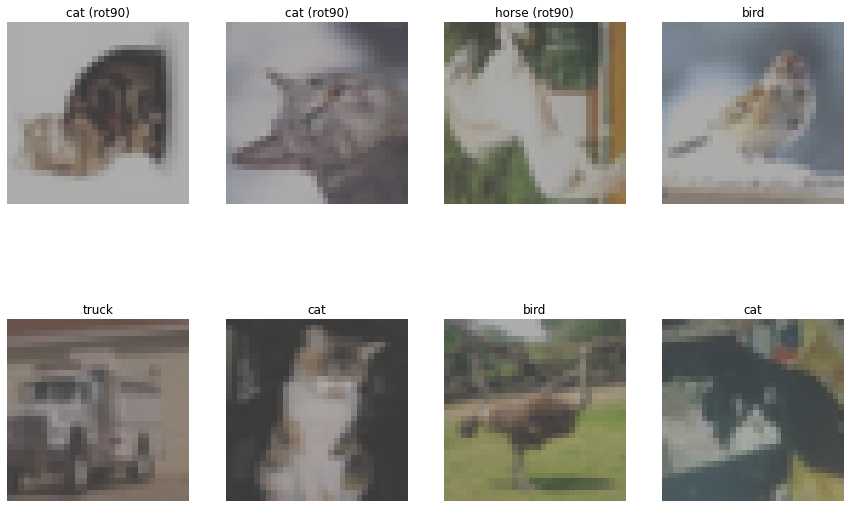

In [24]:
dataiter = iter(trainloader)
images, labels_1, labels_2 = dataiter.next()

# show images
imshow(images[:8], labels_1[:8], labels_2[:8])

**<span style='color:blue'> Exercice</span>** 
**Adaptez le code ci-dessous afin de gérer un apprentissage multi-tâches. Si l'argument $\texttt{multitask}$ vaut $\texttt{False}$, alors on reste sur un apprentissage classique.**



 ----

In [ ]:
####### Complete this part ######## or die ####################
def train(model, nb_epochs, multitask, loader, optimizer, gamma=0.8, print_freq=20):
    loss_history = []
    
    criterion = CrossEntropyLoss()

    for epoch in range(nb_epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(loader, 0):
            inputs, labels = data
            # inputs = inputs.cuda()
            # labels = labels.cuda()
            
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = model(inputs)

            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % print_freq == print_freq - 1:    # print every 2000 mini-batches
                print('\r [%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / print_freq), end='')
                loss_history.append(running_loss / print_freq)
                running_loss = 0.0
    print('\r *** Finished Training ***')
    return loss_history
###############################################################


In [26]:
def test(model, loader, multitask):
    correct = 0
    total = 0
    model.eval()
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in loader:
            images, labels = data
            # calculate outputs by running images through the network
            # images = images.cuda()
            # labels = labels.cuda()
            outputs = model(images)
            if multitask:
                outputs = outputs[0]
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(
        'Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
    model.train()

In [27]:
def plot_loss(loss_history):
    plt.figure(figsize=(12, 8))
    plt.plot(loss_history)
    plt.ylabel('Cross entropy')
    plt.title('Loss')
    plt.show()

**<span style='color:blue'> Exercice</span>** 
**Adaptez le code ci-dessous afin de gérer un modèle multi-tâches. Si l'argument $\texttt{multitask}$ vaut $\texttt{False}$ alors on reste sur un modèle classique.**



 ----

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
####### Complete this part ######## or die ####################
class Net(nn.Module):
    def __init__(self, multitask):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        y = self.fc(x)
        return y
###############################################################


In [ ]:
model = Net(False)

optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, weight_decay=0.0005)


In [ ]:
loss_history = train(model, 5, False, trainloader, optimizer)

plot_loss(loss_history)


In [ ]:
test(model, testloader, False)


In [ ]:
model = Net(True)

optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, weight_decay=0.0005)


In [ ]:
loss_history = train(model, 5, True, trainloader, optimizer)

plot_loss(loss_history)

test(model, testloader, True)
